# 1. Deskripsi Data
Dataset ini berisi total nilai belanja Pemerintah Indonesia berdasarkan realisasi APBN pada tahun Anggaran 1990-2013 untuk pos belanja Pemerintah Pusat dan Belanja untuk daerah. Data yang tersajikan ini sudah ter-summary hinggal ke level jenis/tipe pengeluaran. Walaupun di web data.go.id menyatakan bahwa data yang tersaji dari tahun 1990-2013, secara aktual data-nya untuk tahun 2012 dan 2013 nilainya tidak terisi.

Penjelasan mengenai Variabel pada Dataset ini:

* tahun: Tahun APBN
* pos_belanja: Pos Belanja pada APBN (Belanja Pemerintah Pusat atau Anggaran Belanja untuk Daerah)
* tipe_pengeluaran: Tipe dari pengeluaran
* keterangan_pengeluaran: Keterangan mengenai pengeluaran tersebut
* nilai: Nilai dari Belanja tersebut (dalam Milyar Rupiah)

In [14]:
import pandas as pd

real_apbn = pd.read_csv('processed-realisasi-apbn-belanja-indonesia-1990-2013.csv', delimiter = ',', encoding = "ISO-8859-1")
# real_apbn.columns
# real_apbn.iloc[10:15]

# 2. Statistik Data

Pada bagian ini akan disajikan beberapa statistik yang terkait dengan data, diantaranya adalah:

* Kolom yang tersedia
* Jumlah Record secara keseluruhan dan per tahun
* Nilai maksimum dan minimum dari realisasi belanja per tahun
* Rata-rata realisasi belanja per tahun
* Total realisasi belanja per tahun, pos pengeluaran dan tipe pengeluaran

In [15]:
#kolom yang tersedia pada data
real_apbn.columns

Index(['tahun', 'pos_belanja', 'tipe_pengeluaran', 'keterangan_pengeluaran',
       'nilai'],
      dtype='object')

In [16]:
# Jumlah record keseluruhan

real_apbn.count()

tahun                     408
pos_belanja               408
tipe_pengeluaran          408
keterangan_pengeluaran    408
nilai                     363
dtype: int64

In [19]:
# Jumlah record per tahun

real_apbn.groupby('tahun').nilai.count()

tahun
1990    16
1991    16
1992    16
1993    16
1994    16
1995    16
1996    16
1997    16
1998    16
1999    16
2000    16
2001    17
2002    17
2003    17
2004    17
2005    17
2006    17
2007    17
2008    17
2009    17
2010    17
2011    17
2012     0
2013     0
Name: nilai, dtype: int64

In [21]:
# Nilai maksimum dari realisasi belanja per tahun

real_apbn.groupby('tahun').nilai.max()

tahun
1990      7952.0
1991     10072.0
1992     11114.0
1993     11985.0
1994     12942.0
1995     13715.0
1996     15830.0
1997     18572.0
1998     28607.0
1999     10072.0
2000     53809.6
2001     68381.0
2002     69159.0
2003     76978.0
2004     82131.0
2005     95599.0
2006    145664.0
2007    164787.0
2008    179507.0
2009    186414.0
2010    203572.0
2011    225534.0
2012         NaN
2013         NaN
Name: nilai, dtype: float64

In [22]:
# Nilai minimum dari realisasi belanja per tahun

real_apbn.groupby('tahun').nilai.min()

tahun
1990        0.0
1991        0.0
1992        0.0
1993        0.0
1994        0.0
1995        0.0
1996        0.0
1997        0.0
1998        0.0
1999        0.0
2000        0.0
2001        0.0
2002        0.0
2003        0.0
2004      -10.0
2005    -1987.0
2006     -917.0
2007     -237.0
2008   -58721.0
2009        0.0
2010      -17.0
2011      -48.0
2012        NaN
2013        NaN
Name: nilai, dtype: float64

In [23]:
# Rata-rata realisasi belanja per tahun

real_apbn.groupby('tahun').nilai.mean()

tahun
1990     2484.687500
1991     2786.437500
1992     3253.000000
1993     3614.625000
1994     3913.000000
1995     4083.875000
1996     5138.812500
1997     6831.312500
1998    10791.875000
1999     2786.437500
2000    13841.668750
2001    20091.941176
2002    18951.764706
2003    22147.529412
2004    25128.058824
2005    29978.470588
2006    39134.941176
2007    44567.529412
2008    54533.529412
2009    55141.058824
2010    61296.941176
2011    79052.294118
2012             NaN
2013             NaN
Name: nilai, dtype: float64

In [26]:
# TOtal realisasi belanja per tahun, pos pengeluaran dan tipe pengeluaran

real_apbn.groupby(['tahun','pos_belanja','tipe_pengeluaran']).nilai.sum()

tahun  pos_belanja                                         tipe_pengeluaran                     
1990   Anggaran Belanja untuk Daerah / Transfer ke Daerah  Dana Otonomi Khusus dan Penyeimbangan         0.0
                                                           Dana Perimbangan                           6888.0
       Belanja Pemerintah Pusat                            Pengeluaran Pembangunan                   14987.0
                                                           Pengeluaran Rutin                         17880.0
       Suspen                                              Suspen                                        0.0
1991   Anggaran Belanja untuk Daerah / Transfer ke Daerah  Dana Otonomi Khusus dan Penyeimbangan         0.0
                                                           Dana Perimbangan                           8490.0
       Belanja Pemerintah Pusat                            Pengeluaran Pembangunan                   18662.0
                               

# 3. Visualisasi Data

Pada bagian ini akan disajikan beberapa visualisasi yang terkait dengan data, diantaranya adalah:

* Trend Total Realisasi Belanja per Tahun
* Perbandingan Total untuk daerah selama periode 1990-2011 berdasar pos pengeluaran
* Perbandingan Total selama periode 1990-2011 berdasar tipe pengeluaran

Text(0,0.5,'Jumlah')

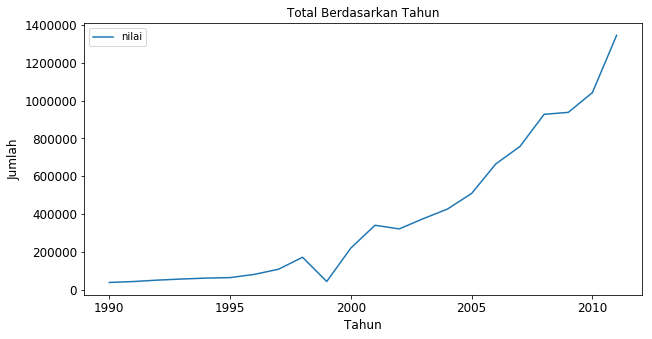

In [32]:
# Trend Total Realisasi Belanja per Tahun < 2012

ax = real_apbn[real_apbn['tahun']<2012].groupby('tahun').nilai.sum()
ax = ax.plot(kind='line', title ="Total Berdasarkan Tahun", figsize = (10,5), legend=True, fontsize=12)
ax.set_xlabel("Tahun", fontsize=12)
ax.set_ylabel("Jumlah", fontsize=12)